In [114]:
import pandas as pd
import matplotlib as mt
import matplotlib.pyplot as plt
import numpy as np
import pyramid
from sklearn.linear_model import LinearRegression
from datetime import datetime
%matplotlib inline

ModuleNotFoundError: No module named 'pyramid'

In [89]:
yesd = pd.read_csv('yesd.csv') 

In [90]:
yesd.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-02-02,171.789993,171.789993,163.809998,166.440002,139.188843,40766690.0
1,2015-02-03,167.979996,168.139999,160.199997,161.429993,134.999115,29277895.0
2,2015-02-04,162.199997,164.380005,158.320007,160.470001,134.196289,18173280.0
3,2015-02-05,160.160004,165.399994,158.800003,161.570007,135.116196,19136815.0
4,2015-02-06,162.000000,163.979996,159.619995,162.160004,135.609604,15057070.0


In [91]:
yesd.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [92]:
yesd = yesd.dropna() 
# droping the NA values

In [93]:
yesd.isna().sum()
# checking if there are any NAs

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [94]:
yesd['Date'] = yesd['Date'].astype('datetime64[ns]')  
# converting the datatype of Date into datetime

In [95]:
from statsmodels.tsa.arima_model import ARIMA 
# for prediction of stock prices by training the data

In [96]:
type(yesd.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [97]:
yesd.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-02-02,171.789993,171.789993,163.809998,166.440002,139.188843,40766690.0
1,2015-02-03,167.979996,168.139999,160.199997,161.429993,134.999115,29277895.0
2,2015-02-04,162.199997,164.380005,158.320007,160.470001,134.196289,18173280.0
3,2015-02-05,160.160004,165.399994,158.800003,161.570007,135.116196,19136815.0
4,2015-02-06,162.000000,163.979996,159.619995,162.160004,135.609604,15057070.0


In [98]:
yesd.set_index('Date', inplace=True)
# making Date as index column

In [99]:
yesd["2019-12"].Close.mean()    # finding mean

51.452381142857135

In [100]:
yesd["2019-12-01":"2019-12-07"]       # data in a given range

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-02,69.000000,69.300003,63.049999,64.050003,64.050003,361756071.0
2019-12-03,64.099998,65.250000,59.000000,59.500000,59.500000,297142445.0
2019-12-04,58.549999,63.450001,56.650002,63.000000,63.000000,340845428.0
2019-12-05,63.000000,64.000000,60.849998,62.099998,62.099998,224990595.0
2019-12-06,60.099998,60.750000,55.150002,56.000000,56.000000,282441286.0


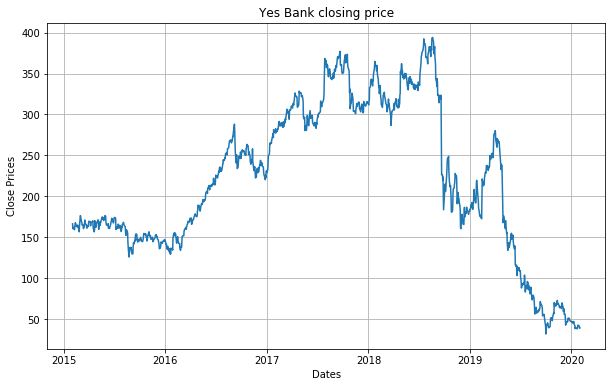

In [102]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(yesd['Close'])
plt.title('Yes Bank closing price')
plt.show()

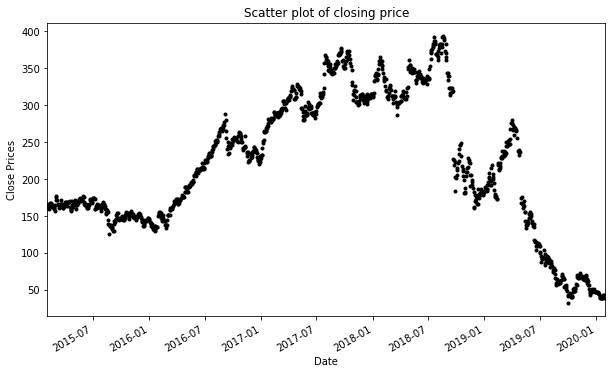

In [103]:
yesd_close = yesd['Close']
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
yesd_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

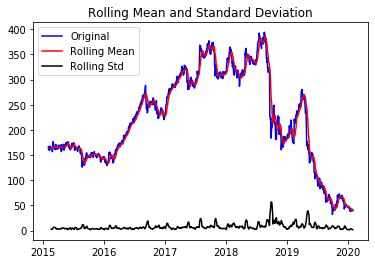

Results of dickey fuller test
Test Statistics                  -0.474224
p-value                           0.896949
No. of lags used                  0.000000
Number of observations used    1229.000000
critical value (1%)              -3.435682
critical value (5%)              -2.863895
critical value (10%)             -2.568024
dtype: float64


In [105]:
#Test for staionarity
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(yesd_close)

To accept the null hypothesis the Test Statistics Value should be greater than the Critical Values. So here in this particular case we are accepting the null hypothesis.

<Figure size 432x288 with 0 Axes>

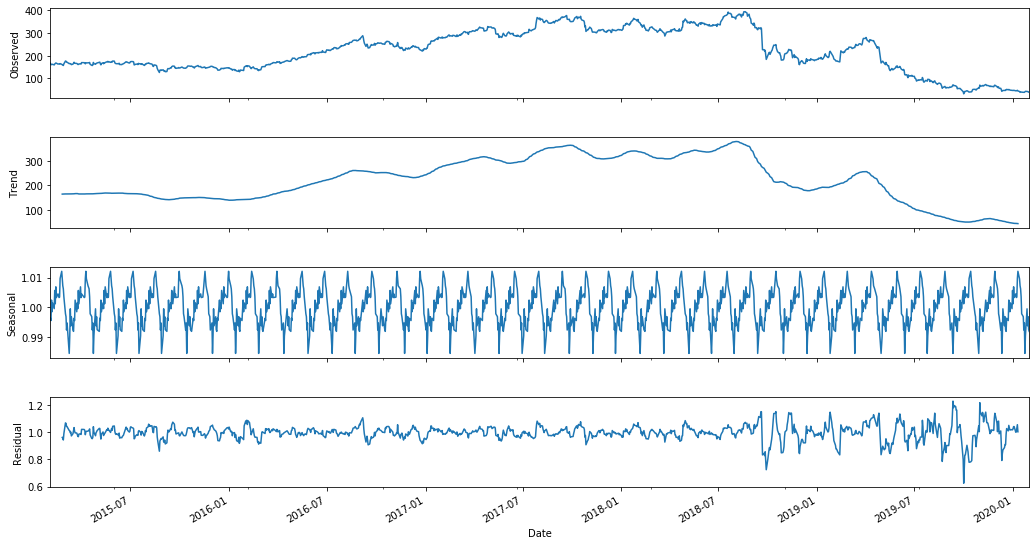

In [109]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(yesd_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [116]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

NameError: name 'auto_arima' is not defined